### Funcion: plot_features_num_classification

Esta función recibe un dataframe, una argumento "target_col" con valor por defecto "", una lista de strings ("columns") cuyo valor por defecto es la lista vacía,  y un argumento ("pvalue") con valor 0.05 por defecto.

Si la lista no está vacía, la función pintará una pairplot del dataframe considerando la columna designada por "target_col" y aquellas incluidas en "column" que cumplan el test de ANOVA para el nivel 1-pvalue de significación estadística. La función devolverá los valores de "columns" que cumplan con las condiciones anteriores. Ojo, se espera que las columnas sean numéricas. El pairplot utilizar como argumento de hue el valor de target_col.

Si la lista está vacía, entonces la función igualará "columns" a las variables numéricas del dataframe y se comportará como se describe en el párrafo anterior.

EXTRA_1: Se valorará adicionalmente el hecho de que si el número de valores posibles de target_Col se superior a 5, se usen diferentes pairplot diferentes, en cuyo caso pintará un pairplot por cada 5 valores de target posibles.

EXTRA_2: Se valorará adicionalmente el hecho de que si la lista de columnas a pintar es grande se pinten varios pairplot con un máximo de cinco columnas en cada pairplot (siendo siempre una de ellas la indicada por "target_col")

De igual manera que en la función descrita anteriormente deberá hacer un check de los valores de entrada y comportarse como se describe en el último párrafo de la función `get_features_num_classification`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math

In [2]:
def paramns_check(df:pd.DataFrame, target_col:str, columns:list, pvalue:float) -> bool:
    '''
    Esta es una funcion de comprobacion para los parametros.

    Comprobamos que:

    .- el parametro df es un dataframe de pandas
    .- el target seleccionado es categorico, definido por un str que referencia clases, en caso de ser numerico corresponderia mapearlo a str
    .- que las columnas proporcionadas son numericas 
    .- que el pvalue es numerico y esta entre 0 y 1

    La funcion devuelve un booleano que certifica si los parametros introducidos son adecuados.
    '''
    
    try:
        if type(df) != pd.core.frame.DataFrame:
            return False
        if df[target_col].dtype != 'object':
            return False
        for col in columns:
            pd.to_numeric(df[col])
        if (float(pvalue) > 1) or (float(pvalue) < 0):
            return False
    except:
        return False
    
    return True

In [3]:
'''def plot_features_num_classification(df:pd.DataFrame, target_col:str= '', columns:list= [], pvalue:float= 0.05) -> list:



    paramns_ok = paramns_check(df, target_col, columns, pvalue)
    if not paramns_ok:
        print('Los parametros introduciodos son incorrectos.')
        return None

    if not columns:
        columns = df.describe().columns.tolist()

    col_anova = []

    grps = df[target_col].unique().tolist()
    for feature in columns:
        prov_list = []
        
        for grp in grps:
            prov_list.append(df[df[target_col] == grp][feature])
        #print(prov_list)
        f_st, p_va = stats.f_oneway(*prov_list)
        if p_va <= pvalue: 
            col_anova.append(feature) 
        
    col_anova.insert(0, target_col)

    q_lineas = math.ceil((len(col_anova)-1)/5)

    def gen_columns():

        while True:
            for num in range(5):
                yield num

    def gen_lines():

        for num in range(q_lineas):
            yield num

    contador_lineas = gen_lines()
    contador_columnas = gen_columns()


    fig, axs = plt.subplots(q_lineas, 5, figsize=(20, 10))
    fig.suptitle('Correlación target categorico VS features numéricas con significancia estadistica > 1-pvalue')

    pasador_lineas = 0
    linea = next(contador_lineas)
    for feature_index in range(1, len(col_anova)):
        pasador_lineas += 1
        if pasador_lineas == 6:
            linea = next(contador_lineas)
            pasador_lineas = 1
        columna = next(contador_columnas)
    
        try:
            for i in df[col_anova[0]].unique():     
                sns.histplot(df[df[col_anova[0]] == i][col_anova[feature_index]], kde= True, ax= axs[linea, columna], label= i)
            axs[linea ,columna].legend()
        except IndexError:
            for i in df[col_anova[0]].unique():     
                sns.histplot(df[df[col_anova[0]] == i][col_anova[feature_index]], kde= True, ax= axs[columna], label= i)
            axs[columna].legend()
    plt.show()

    sns.pairplot(df[col_anova], hue= target_col)
    plt.suptitle('Colinealidad features numéricas con significancia estadistica > 1-pvalue')
    plt.subplots_adjust(top=0.95) 
    plt.show()
    col_anova.remove(target_col)
    
    return col_anova
    '''

"def plot_features_num_classification(df:pd.DataFrame, target_col:str= '', columns:list= [], pvalue:float= 0.05) -> list:\n\n\n\n    paramns_ok = paramns_check(df, target_col, columns, pvalue)\n    if not paramns_ok:\n        print('Los parametros introduciodos son incorrectos.')\n        return None\n\n    if not columns:\n        columns = df.describe().columns.tolist()\n\n    col_anova = []\n\n    grps = df[target_col].unique().tolist()\n    for feature in columns:\n        prov_list = []\n        \n        for grp in grps:\n            prov_list.append(df[df[target_col] == grp][feature])\n        #print(prov_list)\n        f_st, p_va = stats.f_oneway(*prov_list)\n        if p_va <= pvalue: \n            col_anova.append(feature) \n        \n    col_anova.insert(0, target_col)\n\n    q_lineas = math.ceil((len(col_anova)-1)/5)\n\n    def gen_columns():\n\n        while True:\n            for num in range(5):\n                yield num\n\n    def gen_lines():\n\n        for num in ran

In [18]:
'''# version sin generador de lineas

def plot_features_num_classification(df:pd.DataFrame, target_col:str= '', columns:list= [], pvalue:float= 0.05) -> list:

    '
    Parametros:
    .- df: un dataframe de pandas
    .- target_col: el nombre de la variable target (debe ser categorica objeto/str, si contiene numeros, procede mapearla)
    .- columns: el nombre de las variables numericas del df, adjuntas en una lista (vacia por defecto)
    .- pvalue: el valor con que queremos comprobar la significancia estadistica, 0.05 por defecto

    Esta funcion cumple tras objetivos: a saber:

    1.- retorna una lista con los nombres de las features numericas que superan un test anova de significancia estadistica superior al establecido en pvalue
    2.- printa una relacion de graficas comparativas de correlacion target-variables numericas para su estudio y miniEDA
    3.- printa una relacion de graficas comparativas de colinealidad entre las distinta variables numericas para su estudio y miniEDA

    Explicamos la funcion mas en detalle a continuacion.
    

    paramns_ok = paramns_check(df, target_col, columns, pvalue) # comprobamos que los parametros son adecuados, si no lo son retornamos None y printamos que no lo son
    if not paramns_ok:
        print('Los parametros introduciodos son incorrectos.')
        return None

    if not columns: # si no adjuntamos lista de var numericas, cogemos todas las numericas del df
        columns = df.describe().columns.tolist()

    col_anova = [] # creamos lista vacia donde almacenaremos los nombres de var numericas que cumplen el test anova

    # a continuacion realizamos el test anova
    grps = df[target_col].unique().tolist() # almacenamo los diferentes valores posibles del target en una lista
    for feature in columns: # iteramos las var numricas
        prov_list = [] # lista provisional donde almacenaremos las series de realcion de cada var numrica con los diferentes valores del target
        
        for grp in grps:
            prov_list.append(df[df[target_col] == grp][feature]) # agregamos a la lista las series que comentabamos antes
        
        f_st, p_va = stats.f_oneway(*prov_list) # realizamos el test anova sobre la var numerica de turno (en iteracion actual) en relacion con cada valor del target y comprobamos su pvalue en funcion de su varianza
        if p_va <= pvalue: # si hay significancia estadistica recahazamos H0(medias similares) y adjuntamos el nombre de la feature a col_anova 
            col_anova.append(feature) 
    
    # empezamos con las graficas
    col_anova.insert(0, target_col) # adjuntamos el target a col_anova porque lo necesitaremos para comparar y graficar

    # creamos una primera serie de graficas relacion target(categorica) con las features numericas
    # utilizaremos subplots para reflejar cada grafica individualmente. Estos subplots son referenciados mediante arrays, importante

    q_lineas = math.ceil((len(col_anova)-1)/5) # calculamos la cantidad de lineas que compondra en la figura grafica / array (cada linea comprendera 5 subplots / columnas)

    # vamos a jugar con generadores, uno simple en realidad, no lo hemos visto en temario pero para este caso resulta de mucha utilidad
    # para movernos por los subplots de la figura grafica de turno deberemos iterar las columnas segun grafiquemos diferentes relaciones target-features
    # esta iteracion sera tal que asi: 1º columna 0, 2º columna 1, 3º columna 2, 4º columna 3, 5º columna 4, 6º columna 0, 7º columna 1 etc etc
    # necesitamos reseterar la columna cada vez que graficamos una columna 4 (5º grafica seguida) 
    def gen_columns():
        # este generador cuenta 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1...
        while True:
            for num in range(5):
                yield num

    contador_columnas = gen_columns() # instanciamos el generador


    fig, axs = plt.subplots(q_lineas, 5, figsize=(20, 4*q_lineas)) # generamos la figura grafica con la cantidad de lineas y 5 columnas, tamño acorde a la q de lineas
    fig.suptitle('Correlación target categorico VS features numéricas con significancia estadistica > 1-pvalue')
    plt.subplots_adjust(top=0.9)

    pasador_lineas = 0 # creo un pasardor de linea para controlar cuando procede cambiar de linea al graficas
    linea = 0 # comenzamos en la linea 0, primera
    # comenzamos a iterar las features que tenemos que graficas
    for feature_index in range(1, len(col_anova)): # rango 1 hata final porque la primera es el target y no queremos graficar target-target
        pasador_lineas += 1 # aumentamos 1 el pasador de linear para controlar el salto de linea
        if pasador_lineas == 6: # si llega a 6(hemos dibujado la 5º grafica de la linea, toca saltar de linea)
            linea += 1 # saltamos de linea
            pasador_lineas = 1 # reiniciamos el controlador de linea
            
        columna = next(contador_columnas) # pasamos al sigiente valor del generador(columna correspondiente a graficar), esto se realizara cada iteracion de feature
    
        try: # presumimos que la grafica dispondra de mas de 1 linea y graficaremos en consecuencia... 
            for i in df[col_anova[0]].unique():     
                sns.histplot(df[df[col_anova[0]] == i][col_anova[feature_index]], kde= True, ax= axs[linea, columna], label= i)
            axs[linea ,columna].legend()
        except IndexError: # si la figura solo dispone de 1 linea la graficacion dara error y graficamos en consecuencia
            for i in df[col_anova[0]].unique():     
                sns.histplot(df[df[col_anova[0]] == i][col_anova[feature_index]], kde= True, ax= axs[columna], label= i)
            axs[columna].legend()
    plt.show() # mostramos la figura grafica

    # graficamos la colinealidad
    sns.pairplot(df[col_anova], hue= target_col) # pairplot para todas las features numericas que han superado la significancia estadistica
    plt.suptitle('Colinealidad features numéricas con significancia estadistica > 1-pvalue')
    plt.subplots_adjust(top=0.9) 
    plt.show() # mostramos grafica
    col_anova.remove(target_col) # quitamos el target de la lista de features que han superado el test (ya ha sido util para graficar)
    
    return col_anova # devolvemos los nombres de las features que han superado la significancia estadistica'''
    

In [ ]:
# version con generador de indices

def plot_features_num_classification(df:pd.DataFrame, target_col:str= '', columns:list= [], pvalue:float= 0.05) -> list:

    '''
    Parametros:
    .- df: un dataframe de pandas
    .- target_col: el nombre de la variable target (debe ser categorica objeto/str, si contiene numeros, procede mapearla)
    .- columns: el nombre de las variables numericas del df, adjuntas en una lista (vacia por defecto)
    .- pvalue: el valor con que queremos comprobar la significancia estadistica, 0.05 por defecto

    Esta funcion cumple tras objetivos: a saber:

    1.- retorna una lista con los nombres de las features numericas que superan un test anova de significancia estadistica superior al establecido en pvalue
    2.- printa una relacion de graficas comparativas de correlacion target-variables numericas para su estudio y miniEDA
    3.- printa una relacion de graficas comparativas de colinealidad entre las distinta variables numericas para su estudio y miniEDA

    Explicamos la funcion mas en detalle a continuacion.
    '''

    paramns_ok = paramns_check(df, target_col, columns, pvalue) # comprobamos que los parametros son adecuados, si no lo son retornamos None y printamos que no lo son
    if not paramns_ok:
        print('Los parametros introduciodos son incorrectos.')
        return None

    if not columns: # si no adjuntamos lista de var numericas, cogemos todas las numericas del df
        columns = df.describe().columns.tolist()

    col_anova = [] # creamos lista vacia donde almacenaremos los nombres de var numericas que cumplen el test anova

    # a continuacion realizamos el test anova
    grps = df[target_col].unique().tolist() # almacenamo los diferentes valores posibles del target en una lista
    for feature in columns: # iteramos las var numricas
        prov_list = [] # lista provisional donde almacenaremos las series de realcion de cada var numrica con los diferentes valores del target
        
        for grp in grps:
            prov_list.append(df[df[target_col] == grp][feature]) # agregamos a la lista las series que comentabamos antes
        
        f_st, p_va = stats.f_oneway(*prov_list) # realizamos el test anova sobre la var numerica de turno (en iteracion actual) en relacion con cada valor del target y comprobamos su pvalue en funcion de su varianza
        if p_va <= pvalue: # si hay significancia estadistica recahazamos H0(medias similares) y adjuntamos el nombre de la feature a col_anova 
            col_anova.append(feature) 
    
    # empezamos con las graficas
    col_anova.insert(0, target_col) # adjuntamos el target a col_anova porque lo necesitaremos para comparar y graficar

    # creamos una primera serie de graficas relacion target(categorica) con las features numericas
    # utilizaremos subplots para reflejar cada grafica individualmente. Estos subplots son referenciados mediante arrays, importante

    q_lineas = math.ceil((len(col_anova)-1)/5) # calculamos la cantidad de lineas que compondra en la figura grafica / array (cada linea comprendera 5 subplots / columnas)

    # vamos a jugar con generadores, uno simple en realidad, no lo hemos visto en temario pero para este caso resulta de mucha utilidad
    # para movernos por los subplots de la figura grafica de turno deberemos iterar las columnas segun grafiquemos diferentes relaciones target-features
    # este generador genera los indices para el subplot
    def gen_indice():
        
        while True:
            for linea in range(100):
                for columna in range(5):
                    yield linea, columna

    contador_indice = gen_indice() # instanciamos el generador


    fig, axs = plt.subplots(q_lineas, 5, figsize=(20, 4*q_lineas)) # generamos la figura grafica con la cantidad de lineas y 5 columnas, tamño acorde a la q de lineas
    fig.suptitle('Correlación target categorico VS features numéricas con significancia estadistica > 1-pvalue')
    plt.subplots_adjust(top=0.9)

    columna = 0 # comenzamos en la linea 0, primera
    indice = next(contador_indice) # primer indice [0, 0]
    # comenzamos a iterar las features que tenemos que graficas
    for feature_index in range(1, len(col_anova)): # rango 1 hata final porque la primera es el target y no queremos graficar target-target
    
        try: # presumimos que la grafica dispondra de mas de 1 linea y graficaremos en consecuencia... 
            for i in df[col_anova[0]].unique():     
                sns.histplot(df[df[col_anova[0]] == i][col_anova[feature_index]], kde= True, ax= axs[indice], label= i)
            axs[indice].legend()
            indice = next(contador_indice) # siguiente indice
        except IndexError: # ...si la figura solo dispone de 1 linea la graficacion dara error y graficamos en consecuencia
            for i in df[col_anova[0]].unique():     
                sns.histplot(df[df[col_anova[0]] == i][col_anova[feature_index]], kde= True, ax= axs[columna], label= i)
            axs[columna].legend()
            columna += 1 # siguiente columna
    plt.show() # mostramos la figura grafica

    # graficamos la colinealidad
    sns.pairplot(df[col_anova], hue= target_col) # pairplot para todas las features numericas que han superado la significancia estadistica
    plt.suptitle('Colinealidad features numéricas con significancia estadistica > 1-pvalue')
    plt.subplots_adjust(top=0.9) 
    plt.show() # mostramos grafica
    col_anova.remove(target_col) # quitamos el target de la lista de features que han superado el test (ya ha sido util para graficar)
    
    return col_anova # devolvemos los nombres de las features que han superado la significancia estadistica
    

In [5]:
df_titanic = pd.read_csv('titanic.csv')
df_banca = pd.read_csv('credit_npo.csv')

df_titanic['survived'] = df_titanic['survived'].apply(lambda x: 'sobrevive' if x == 1 else 'muere')
df_banca['SeriousDlqin2yrs'] = df_banca['SeriousDlqin2yrs'].apply(lambda x: 'debt' if x == 1 else 'no_debt')

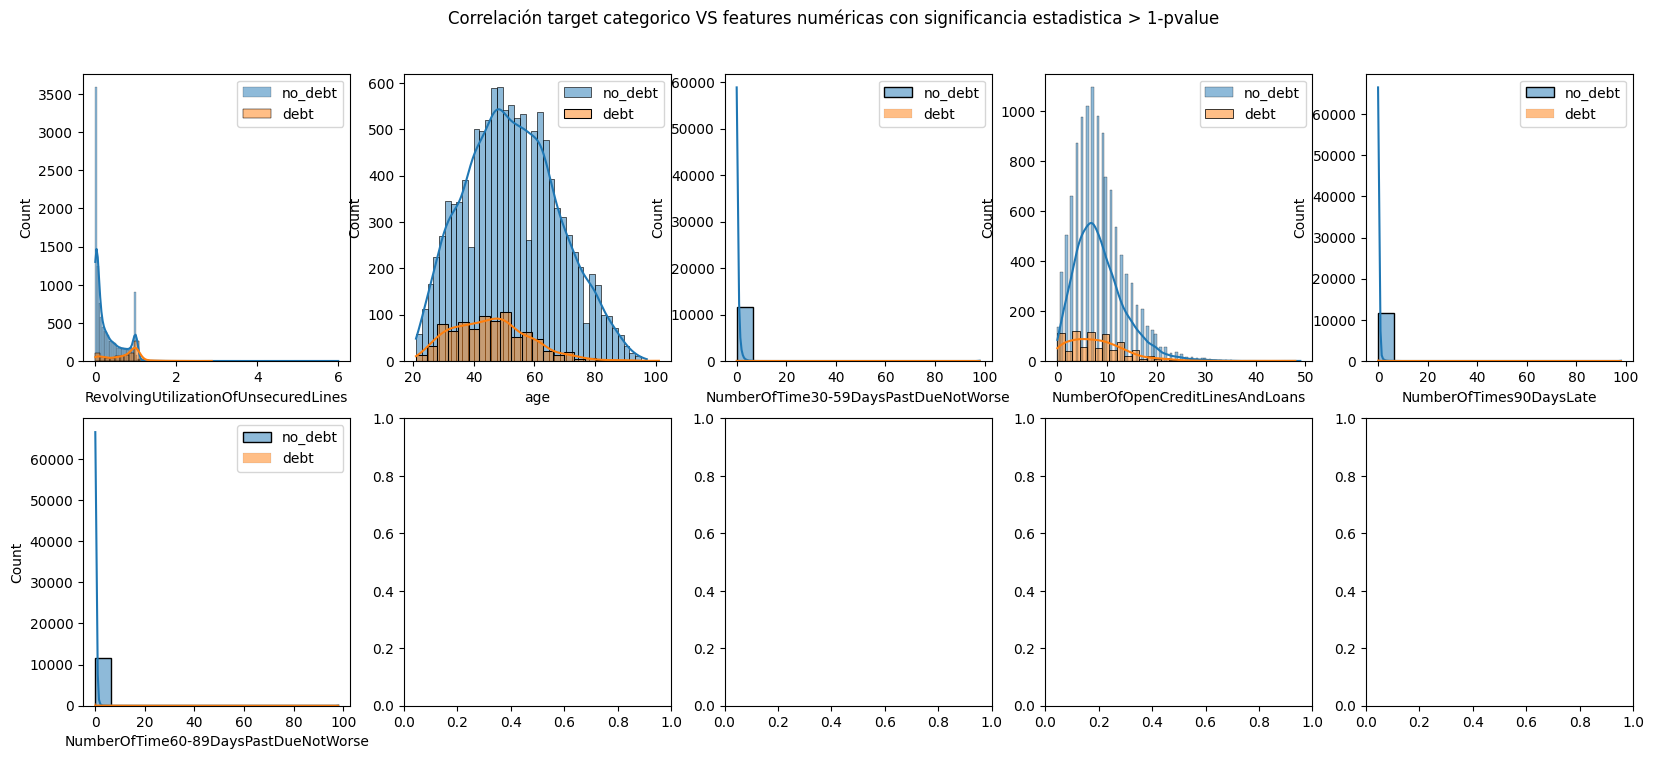

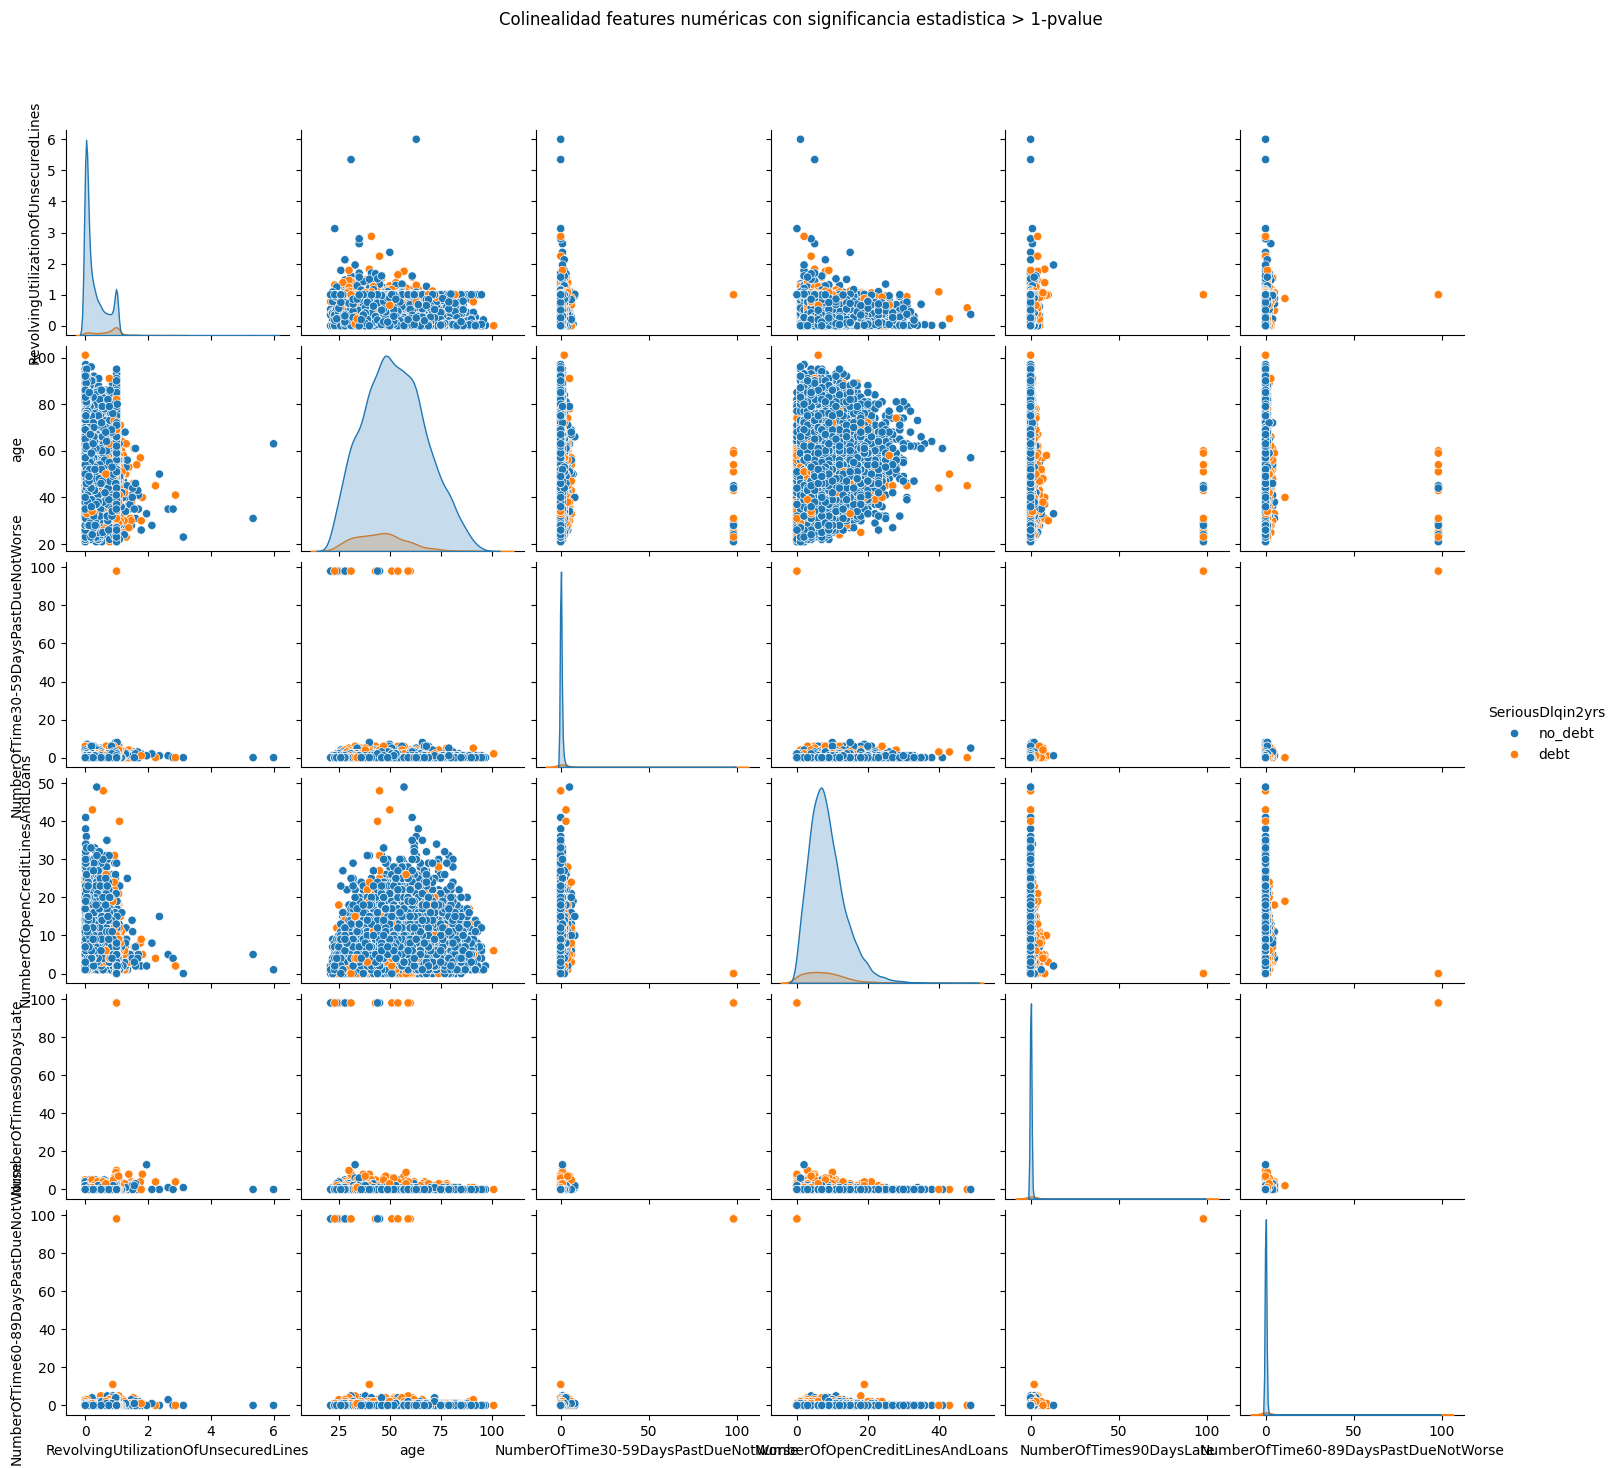

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse']

In [19]:
plot_features_num_classification(df_banca, 'SeriousDlqin2yrs')

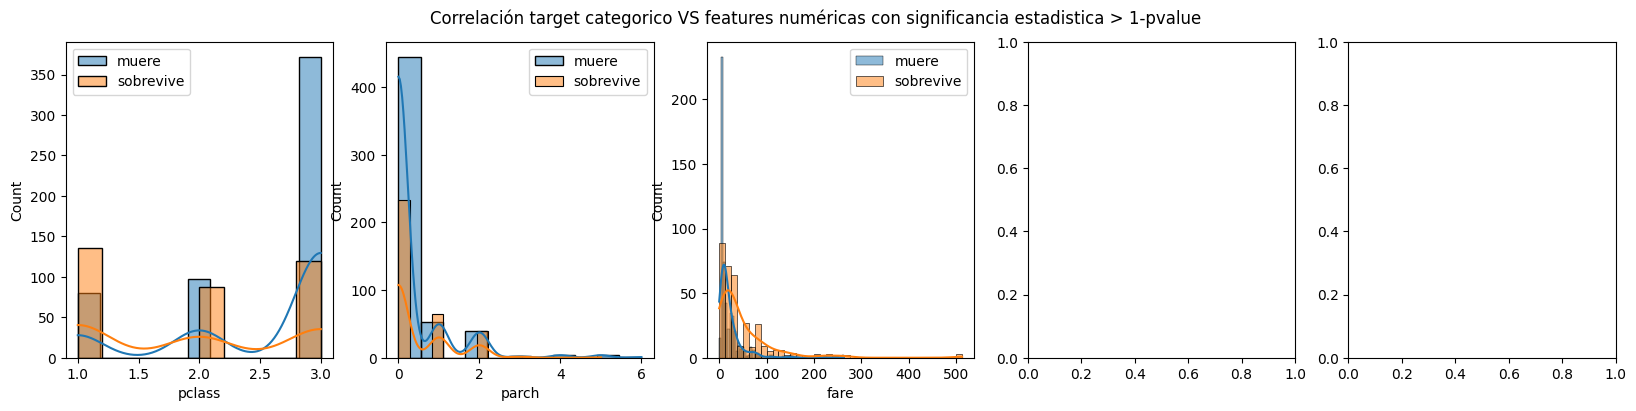

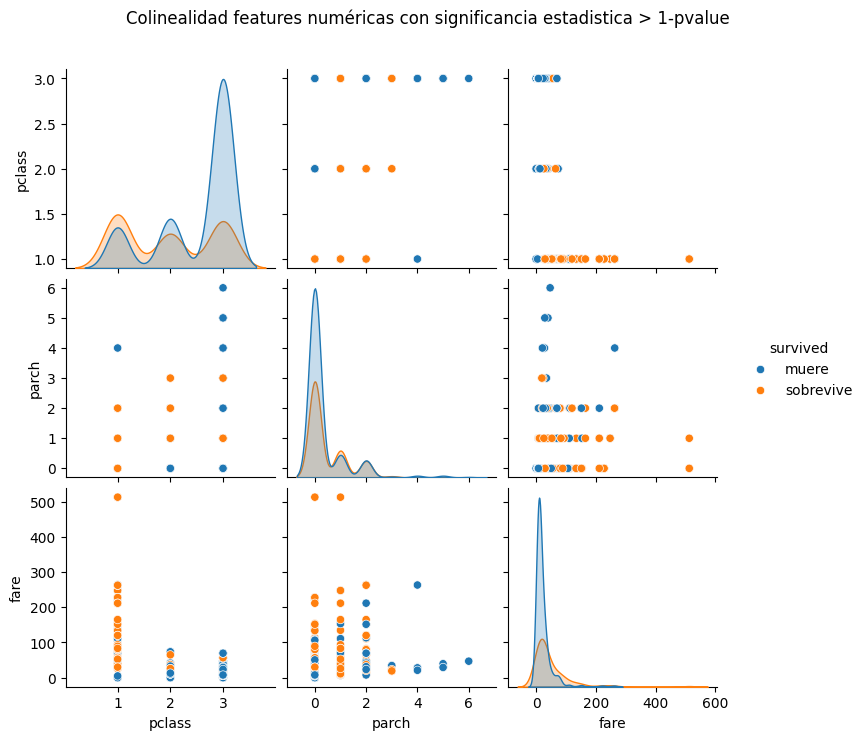

['pclass', 'parch', 'fare']

In [20]:
plot_features_num_classification(df_titanic, 'survived')